In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.contrib import keras

%matplotlib inline

In [3]:
from tensorflow.keras import models
from tensorflow.keras import losses,optimizers,metrics
from tensorflow.keras import layers

## Data Preparation

In [4]:
labeled_images = pd.read_csv('train.csv')
images = labeled_images.iloc[:,1:]
labels = labeled_images.iloc[:,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, test_size=0.02)

#### convert the data to the right type

In [10]:
x_train = train_images.values.reshape(train_images.shape[0],28,28,1)
x_test = test_images.values.reshape(test_images.shape[0],28,28,1)
y_train = train_labels.values
y_test = test_labels.values

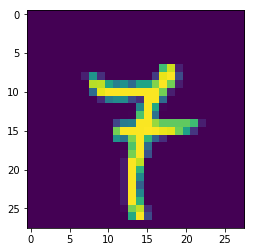

In [22]:
plt.imshow(x_train[12].squeeze())

#### convert the data to the right type

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (41160, 28, 28, 1)
41160 train samples
840 test samples


### convert class vectors to binary class matrices - this is for use in the
### categorical_crossentropy loss below

In [26]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Creating the Model with Keras


In [30]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=(6,6),strides=(1,1),padding="same", 
                        activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(layers.Conv2D(filters=64,kernel_size=(6,6),strides=(1,1),padding="same", activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(units=1024,activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        1184      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
__________

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(0.001), 
              metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 41160 samples, validate on 840 samples
Epoch 1/5
24600/41160 [================>.............] - ETA: 1:07 - loss: 0.2430 - acc: 0.9231

KeyboardInterrupt: 

# Tensorflow

### Helper functions for batch learning

In [9]:
class CifarHelper():
    J    self.i = 0
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        # Vertically stacks the training images
        self.training_images = train_images.as_matrix()
        train_len = self.training_images.shape[0]
        
        # Reshapes and normalizes training images
        self.training_images = self.training_images.reshape(train_len,28,28,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.training_labels = one_hot_encode(train_labels.as_matrix().reshape(-1), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        self.test_images = test_images.as_matrix()
        test_len = self.test_images.shape[0]
        
        # Reshapes and normalizes test images
        self.test_images = self.test_images.reshape(test_len,28,28,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = one_hot_encode(test_labels.as_matrix().reshape(-1), 10)

        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100
        x = self.training_images[self.i:self.i+batch_size]
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [8]:
def one_hot_encode(vec, vals=10):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [9]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        # Vertically stacks the training images
        self.training_images = train_images.as_matrix()
        train_len = self.training_images.shape[0]
        
        # Reshapes and normalizes training images
        self.training_images = self.training_images.reshape(train_len,28,28,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.training_labels = one_hot_encode(train_labels.as_matrix().reshape(-1), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        self.test_images = test_images.as_matrix()
        test_len = self.test_images.shape[0]
        
        # Reshapes and normalizes test images
        self.test_images = self.test_images.reshape(test_len,28,28,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = one_hot_encode(test_labels.as_matrix().reshape(-1), 10)

        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100
        x = self.training_images[self.i:self.i+batch_size]
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [9]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        # Intialize some empty variables for later on
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        # Vertically stacks the training images
        self.training_images = train_images.as_matrix()
        train_len = self.training_images.shape[0]
        
        # Reshapes and normalizes training images
        self.training_images = self.training_images.reshape(train_len,28,28,1)/255
        # One hot Encodes the training labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.training_labels = one_hot_encode(train_labels.as_matrix().reshape(-1), 10)
        
        print("Setting Up Test Images and Labels")
        
        # Vertically stacks the test images
        self.test_images = test_images.as_matrix()
        test_len = self.test_images.shape[0]
        
        # Reshapes and normalizes test images
        self.test_images = self.test_images.reshape(test_len,28,28,1)/255
        # One hot Encodes the test labels (e.g. [0,0,0,1,0,0,0,0,0,0])
        self.test_labels = one_hot_encode(test_labels.as_matrix().reshape(-1), 10)

        
    def next_batch(self, batch_size):
        # Note that the 100 dimension in the reshape call is set by an assumed batch size of 100
        x = self.training_images[self.i:self.i+batch_size]
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [10]:
# Before Your tf.Session run these two lines
ch = CifarHelper()
ch.set_up_images()

# During your session to grab the next batch use this line
# (Just like we did for mnist.train.next_batch)
# batch = ch.next_batch(100)

Setting Up Training Images and Labels


/Users/hongtao/anaconda/envs/tfgpu2/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Setting Up Test Images and Labels


/Users/hongtao/anaconda/envs/tfgpu2/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/hongtao/anaconda/envs/tfgpu2/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/hongtao/anaconda/envs/tfgpu2/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


## Creating the Model



** Create 2 placeholders, x and y_true. Their shapes should be: **

* x shape = [None,28,28,1]
* y_true shape = [None,10]

** Create one more placeholder called hold_prob. No need for shape here. This placeholder will just hold a single probability for the dropout. **

In [129]:
x = tf.placeholder(tf.float32, shape=[None,28,28,1])
y_true = tf.placeholder(tf.float32, shape=[None,10])
hold_prob = tf.placeholder(tf.float32)

### Helper Functions

** Grab the helper functions from MNIST with CNN (or recreate them here yourself for a hard challenge!). You'll need: **

* init_weights
* init_bias
* conv2d
* max_pool_2by2
* convolutional_layer
* normal_full_layer

In [130]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# x -->[batch, in_height, in_width, in_channels]
# W --> [filter_height, filter_width, in_channels, out_channels]

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

### Create the Layers



In [131]:
convo_1 = convolutional_layer(x,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [132]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [133]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [134]:
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [135]:
y_pred = normal_full_layer(full_one_dropout,10)

### Loss Function

In [136]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

### Optimizer

In [137]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.00002)
train = optimizer.minimize(cross_entropy)

### Intialize Variables

In [138]:
init = tf.global_variables_initializer()

### Predict

In [139]:
unlabeled_images_test = pd.read_csv('test.csv')
X_unlabeled = unlabeled_images_test.as_matrix().reshape(len(unlabeled_images_test),28,28,1)/255

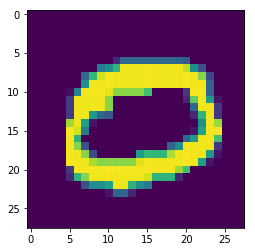

In [140]:
plt.imshow(X_unlabeled[1].reshape(28,28))

In [141]:
X_unlabeled.shape

(28000, 28, 28, 1)

### Saving the Model

In [142]:
saver = tf.train.Saver()

## Graph Session

** Perform the training and test print outs in a Tf session and run your model! **

In [143]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(50000):
        batch = ch.next_batch(100)
        sess.run(train, feed_dict={x: batch[0], y_true: batch[1], hold_prob: 0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0}))
            print('\n')
        
    saver.save(sess,'models_saving/my_model.ckpt')

Currently on step 0
Accuracy is:
0.179762


Currently on step 100
Accuracy is:
0.584524


Currently on step 200
Accuracy is:
0.752381


Currently on step 300
Accuracy is:
0.834524


Currently on step 400
Accuracy is:
0.861905


Currently on step 500
Accuracy is:
0.885714


Currently on step 600
Accuracy is:
0.908333


Currently on step 700
Accuracy is:
0.910714


Currently on step 800
Accuracy is:
0.919048


Currently on step 900
Accuracy is:
0.921429


Currently on step 1000
Accuracy is:
0.928572


Currently on step 1100
Accuracy is:
0.932143


Currently on step 1200
Accuracy is:
0.936905


Currently on step 1300
Accuracy is:
0.939286


Currently on step 1400
Accuracy is:
0.941667


Currently on step 1500
Accuracy is:
0.944048


Currently on step 1600
Accuracy is:
0.947619


Currently on step 1700
Accuracy is:
0.944048


Currently on step 1800
Accuracy is:
0.94881


Currently on step 1900
Accuracy is:
0.946429


Currently on step 2000
Accuracy is:
0.947619


Currently on step 2100
Acc

Currently on step 17500
Accuracy is:
0.980952


Currently on step 17600
Accuracy is:
0.982143


Currently on step 17700
Accuracy is:
0.980952


Currently on step 17800
Accuracy is:
0.982143


Currently on step 17900
Accuracy is:
0.979762


Currently on step 18000
Accuracy is:
0.977381


Currently on step 18100
Accuracy is:
0.982143


Currently on step 18200
Accuracy is:
0.982143


Currently on step 18300
Accuracy is:
0.980952


Currently on step 18400
Accuracy is:
0.975


Currently on step 18500
Accuracy is:
0.978571


Currently on step 18600
Accuracy is:
0.983333


Currently on step 18700
Accuracy is:
0.978571


Currently on step 18800
Accuracy is:
0.977381


Currently on step 18900
Accuracy is:
0.982143


Currently on step 19000
Accuracy is:
0.982143


Currently on step 19100
Accuracy is:
0.983333


Currently on step 19200
Accuracy is:
0.977381


Currently on step 19300
Accuracy is:
0.978571


Currently on step 19400
Accuracy is:
0.979762


Currently on step 19500
Accuracy is:
0.9797

Currently on step 34600
Accuracy is:
0.985714


Currently on step 34700
Accuracy is:
0.989286


Currently on step 34800
Accuracy is:
0.985714


Currently on step 34900
Accuracy is:
0.985714


Currently on step 35000
Accuracy is:
0.986905


Currently on step 35100
Accuracy is:
0.986905


Currently on step 35200
Accuracy is:
0.990476


Currently on step 35300
Accuracy is:
0.985714


Currently on step 35400
Accuracy is:
0.985714


Currently on step 35500
Accuracy is:
0.984524


Currently on step 35600
Accuracy is:
0.986905


Currently on step 35700
Accuracy is:
0.983333


Currently on step 35800
Accuracy is:
0.988095


Currently on step 35900
Accuracy is:
0.986905


Currently on step 36000
Accuracy is:
0.985714


Currently on step 36100
Accuracy is:
0.984524


Currently on step 36200
Accuracy is:
0.984524


Currently on step 36300
Accuracy is:
0.986905


Currently on step 36400
Accuracy is:
0.984524


Currently on step 36500
Accuracy is:
0.984524


Currently on step 36600
Accuracy is:
0.9

### Loading a Model

In [144]:
with tf.Session() as sess:
    
    # Restore the model
    saver.restore(sess, 'models_saving/my_model.ckpt')
    

    # Fetch Back Results
    label = sess.run(y_pred, feed_dict={x:X_unlabeled,hold_prob:1.0})

INFO:tensorflow:Restoring parameters from models_saving/my_model.ckpt


In [145]:
label.shape

(28000, 10)

In [146]:
label = np.argmax(label, axis=1 )

In [147]:
label.shape

(28000,)

## Predict the unlabeled test sets using the model

In [148]:
imageId = np.arange(1,label.shape[0]+1).tolist()

In [149]:
prediction_pd = pd.DataFrame({'ImageId':imageId, 'Label':label})

In [150]:
prediction_pd.to_csv('out_cnn4.csv',sep = ',', index = False)